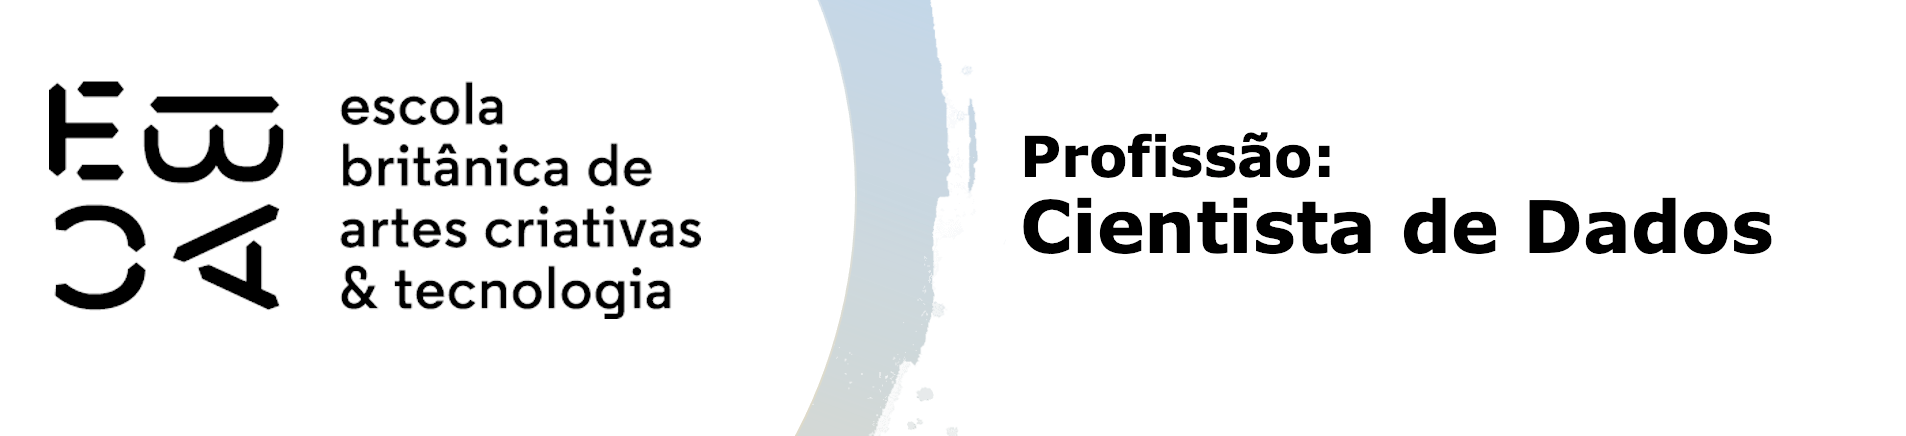

# Métodos hierárquicos de agrupamento - Tarefa

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

from scipy.cluster.hierarchy import dendrogram, linkage

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [70]:
peng = sns.load_dataset('penguins')
peng.index.name = 'id'
peng_num = peng.drop(['species', 'island', 'sex'], axis=1)

In [71]:
peng_num.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [72]:
peng_num = peng_num.dropna()

In [73]:
peng_num.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [74]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [75]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [76]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

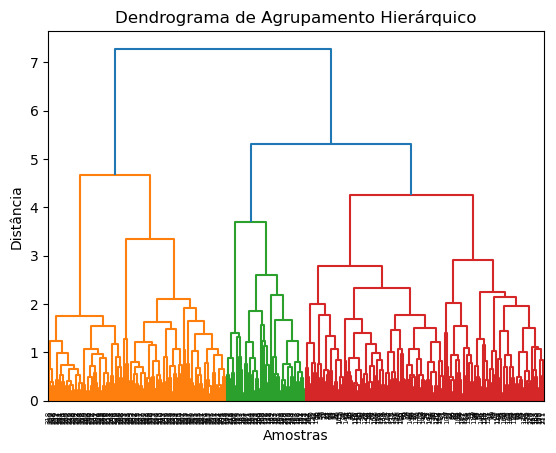

In [77]:
linkage_matrix = linkage(peng_pad, method='complete')

dendrogram(linkage_matrix, labels=peng_num.index)
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.title('Dendrograma de Agrupamento Hierárquico')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [78]:
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [79]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [80]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


In [81]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


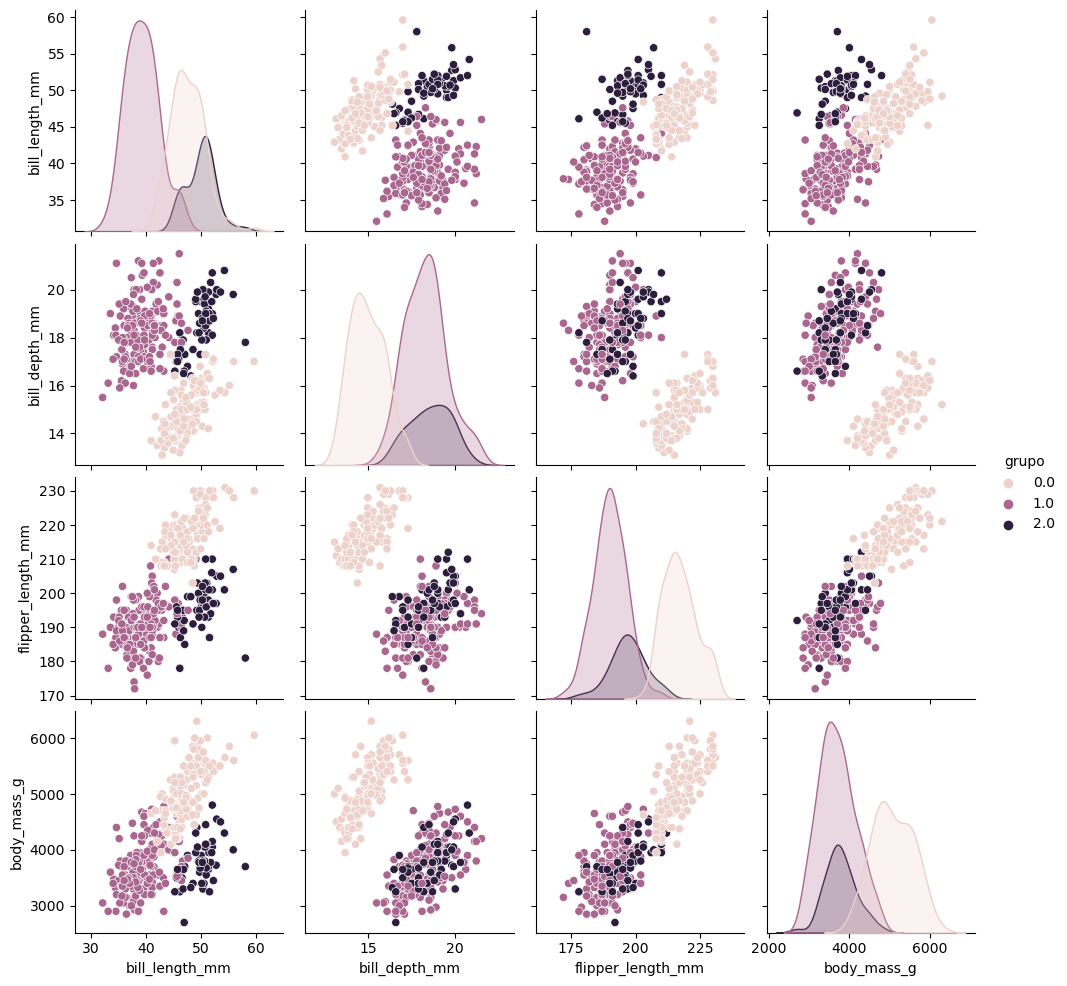

In [82]:
sns.pairplot(data=peng, hue='grupo')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [84]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [85]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [86]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)

In [87]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

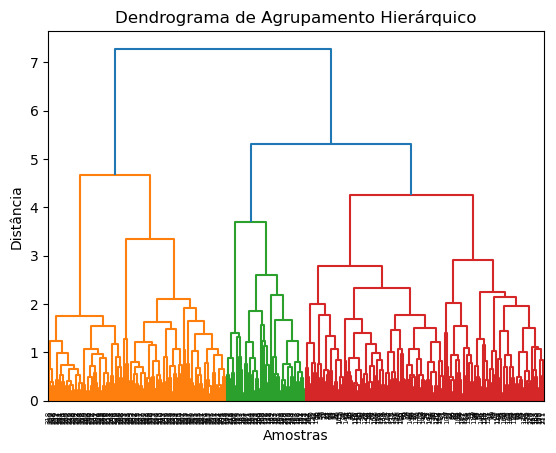

In [88]:
linkage_matrix = linkage(peng_pad, method='complete')

dendrogram(linkage_matrix, labels=peng_num.index)
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.title('Dendrograma de Agrupamento Hierárquico')
plt.show()

In [89]:
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [90]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [91]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [92]:
pd.crosstab(peng['sex'], peng['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0,5.0
sex,,,,,,
Female,9,74,13,49,20,0
Male,61,18,55,0,22,12


RESPOSTA:<br>
Na minha avaliação, o estudo com 3 grupos apresentou resultados mais satisfatórios, onde o algoritmo conseguiu separar claramente os indivíduos em três grupos distintos. Por outro lado, a análise com 6 grupos não está ruim, porém, a segmentação em 3 grupos é consideravelmente mais precisa e adequada para os dados em questão.